### GRIP:THE SPARKS FOUNDATION
### DATA SCIENCE AND BUSINESS ANALYTICS INTERN
# AUTHOR: Smruti Ranjan BHuyan 
## TASK: Perform ‘Exploratory Data Analysis’ on datasets ‘Deliveries’ & 'Matches'

# we will be trying to find out Best teams and Best Batsman within the given data.




In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import warnings as wg
wg.filterwarnings("ignore")


sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Data Preparation and Cleaning

Lets's first load our dataset and take a look on it to have an overview of what our dataset looks like. We will also discard few columns which won't help us in our data visualization.

In [4]:
ipl_df = pd.read_csv('matches.csv')


Let us explain the dataset. So, basically we have a lot of rows and columns here in the dataset. It includes the **Season**, **City** , **Venue**  in which the match was held, the **Date** on which the match was held, the **teams** between which the match was played , information related to **toss** , **winner** and **umpires**.

In [5]:
ipl_df.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [6]:
ipl_df.shape

(756, 18)

So, we have 756 rows and 18 columns in total.

In [7]:
ipl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

We see that in the **umpire3** column, we have only 119 non-null objects. So we can discard them without any issue. Also, we will discard the **umpire1** and **umpire2** columns since they won't be useful in our data analysis.

We have another dataset that contains data of each ball bowled in the last 12 seasons of IPL. Let's see how it looks like.

In [8]:
deliveries_df = pd.read_csv('deliveries.csv')
deliveries_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [9]:
deliveries_df.shape

(179078, 21)

So we have 179078 rows and 21 columns in this dataset. Well, the number of rows is that high as it contains data of each ball.

In [10]:
deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [11]:
# for ipl_df dataframe
discard_columns = ['umpire1','umpire2','umpire3']

In [12]:
ipl_df = ipl_df.drop(columns= discard_columns)

In [13]:
ipl_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium


Earlier we see that, we had three columns called **umpire1** , **umpire2** and **umpire3**. But we do not need them in our analysis as many of their rows contained NaN values. So, we have discarded them and our dataset now contains 15 columns.

In [14]:
ipl_df.team1.value_counts()

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Kochi Tuskers Kerala             7
Rising Pune Supergiants          7
Delhi Capitals                   6
Name: team1, dtype: int64

We can see that, these are the all teams that have played in the last 12 seasons of IPL. Few of them like Delhi Capitals, Gujarat Lions, Kochi Tuskers Kerala didn't play in more than 1-2 seasons. That's why their numbers are so low.

In [15]:
ipl_df.result.value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

The result column in the dataset specifies whether the matched ended normally or there was a tie between the teams or the match was cancelled due to rain or some unavoidable reasons. 

## Exploratory Analysis and Visualization

Now that our dataset is good to go, we can analyze it using plots, pie charts and graphs.

Let's load our cleaned dataset again first.

In [16]:
ipl_df.sample(10)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
58,59,2017,Hyderabad,2017-05-21,Mumbai Indians,Rising Pune Supergiant,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,KH Pandya,"Rajiv Gandhi International Stadium, Uppal"
735,11331,2019,Jaipur,22/04/19,Rajasthan Royals,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,6,RR Pant,Sawai Mansingh Stadium
140,141,2009,Johannesburg,2009-05-02,Chennai Super Kings,Delhi Daredevils,Delhi Daredevils,field,normal,0,Chennai Super Kings,18,0,SB Jakati,New Wanderers Stadium
364,365,2012,Jaipur,2012-05-13,Rajasthan Royals,Pune Warriors,Rajasthan Royals,bat,normal,0,Rajasthan Royals,45,0,A Chandila,Sawai Mansingh Stadium
686,7944,2018,Bengaluru,17/05/18,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Royal Challengers Bangalore,14,0,AB de Villiers,M Chinnaswamy Stadium
557,558,2015,Mumbai,2015-05-07,Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,normal,0,Sunrisers Hyderabad,7,0,EJG Morgan,Brabourne Stadium
377,378,2012,Pune,2012-05-22,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Kolkata Knight Riders,18,0,YK Pathan,Subrata Roy Sahara Stadium
707,11148,2019,Chennai,31/03/19,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,8,0,MS Dhoni,M. A. Chidambaram Stadium
408,409,2013,Chandigarh,2013-04-21,Pune Warriors,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,7,DA Miller,"Punjab Cricket Association Stadium, Mohali"
520,521,2015,Chennai,2015-04-11,Chennai Super Kings,Sunrisers Hyderabad,Chennai Super Kings,bat,normal,0,Chennai Super Kings,45,0,BB McCullum,"MA Chidambaram Stadium, Chepauk"


### Number of matches hosted in different cities

In [17]:
city_host = ipl_df.city.value_counts()
city_host

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Rajkot             10
Mohali             10
Indore              9
Dharamsala          9
Johannesburg        8
Cuttack             7
Ranchi              7
Port Elizabeth      7
Cape Town           7
Abu Dhabi           7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Nagpur              3
Kimberley           3
East London         3
Bloemfontein        2
Name: city, dtype: int64

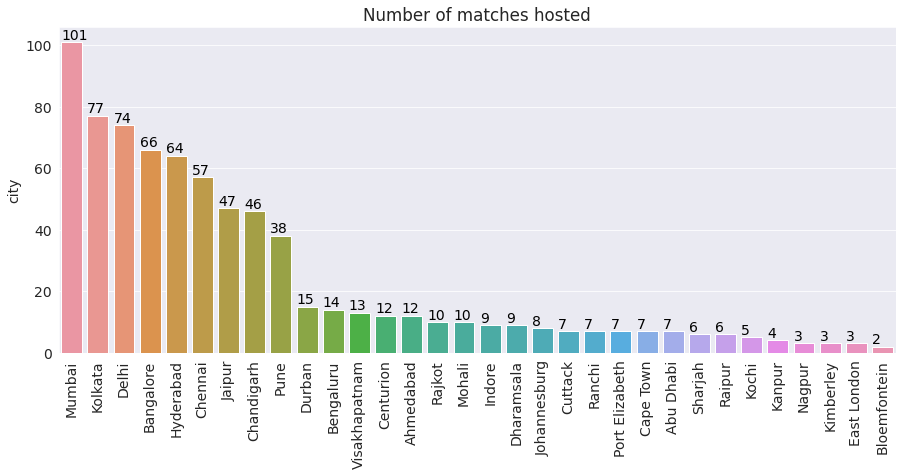

In [18]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
plt.title('Number of matches hosted')
count=0
cities=pd.DataFrame(city_host)
cities['name']=city_host.index
for i in cities['city']:
    plt.text(count-0.4,i+1,str(i),color='black')
    count+=1
sns.barplot(city_host.index, city_host);

So, we can see in the barplot that Mumbai has hosted the maximum number of IPL matches followed by Kolkata and Delhi.

### Maximum Runs Scored By Different Players In An Inning

In [19]:
batting_ings = deliveries_df.groupby(['match_id','batsman']).apply(lambda x : np.sum(x['batsman_runs'])).reset_index(name='Innings Runs')
sorted_batting_ings = batting_ings.sort_values(by='Innings Runs',ascending=False)
top_batsmen_scores = sorted_batting_ings[:10] 
ball_faced = deliveries_df.groupby(['match_id','batsman']).apply(lambda x : x['batsman_runs'].count()).reset_index(name='Balls Faced')
batsmen_performance = pd.merge(top_batsmen_scores, ball_faced, how='inner', left_on=['match_id','batsman'], right_on=['match_id','batsman'])
batsmen_performance['Strike Rate for Match'] = batsmen_performance['Innings Runs']*100 / batsmen_performance['Balls Faced']
batsmen_innings = pd.merge(batsmen_performance, deliveries_df, how='inner',left_on=['match_id','batsman'],right_on=['match_id','batsman'])
batsmen_innings_table = batsmen_innings.iloc[:,1:8]
batsmen_innings_table2 = batsmen_innings_table.drop_duplicates()
batsmen_innings_table2

,batsman,Innings Runs,Balls Faced,Strike Rate for Match,inning,batting_team,bowling_team
0,CH Gayle,175,69,253.623188,1,Royal Challengers Bangalore,Pune Warriors
69,BB McCullum,158,77,205.194805,1,Kolkata Knight Riders,Royal Challengers Bangalore
146,AB de Villiers,133,61,218.032787,1,Royal Challengers Bangalore,Mumbai Indians
207,RR Pant,130,64,203.125000,1,Delhi Daredevils,Sunrisers Hyderabad
271,AB de Villiers,129,53,243.396226,1,Royal Challengers Bangalore,Gujarat Lions
324,CH Gayle,128,62,206.451613,1,Royal Challengers Bangalore,Delhi Daredevils
386,M Vijay,127,57,222.807018,1,Chennai Super Kings,Rajasthan Royals
443,DA Warner,126,60,210.000000,1,Sunrisers Hyderabad,Kolkata Knight Riders
503,V Sehwag,122,62,196.774194,1,Kings XI Punjab,Chennai Super Kings
565,SR Watson,121,60,201.666667,2,Chennai Super Kings,Sunrisers Hyderabad


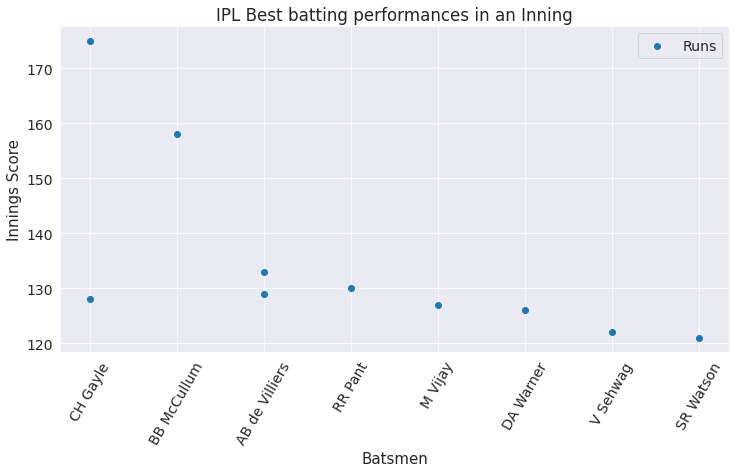

In [20]:
x=batsmen_innings_table2['batsman']
y1=batsmen_innings_table2['Innings Runs']
plt.figure(figsize=(12,6))
plt.scatter(x,y1)
plt.xlabel('Batsmen',size=15)
plt.ylabel('Innings Score',size=15)
plt.title('IPL Best batting performances in an Inning')
plt.xticks(rotation=60)
plt.legend(['Runs']);

We can see that Chris Gayle is the one who has scored the maximum runs(175*) in a match followed by Brendon McCullum and AB de Villiers.

Well, if you are an IPL fan, you must have been aware of this Gayle Storm that hit the Chinnaswamy Stadium on April 23,2013. Gayle scored an unbeaten 175 against Pune Warriors with 17 sixes and 13 fours in just 66 balls and a strike rate of 265.15 . Isn't that something the Universe Boss can only do??

In the above graph, we can see two players, Chris Gayle and AB de Villers, have appeared twice and they both play for Royal Challengers Bangalore. But there's a fun fact, despite having world class players like Gayle, Kohli and ABD , RCB has never won any season of IPL.

### Maximum Wickets taken by bowlers in last 12 seasons

In [21]:
bowling_wickets = deliveries_df[deliveries_df['dismissal_kind']!='run out']
bowling_total = bowling_wickets.groupby('bowler').apply(lambda x : x['dismissal_kind'].dropna()).reset_index(name='Wickets')
bowling_wicket_count = bowling_total.groupby('bowler').count().reset_index()
bowling_top = bowling_wicket_count.sort_values(by='Wickets',ascending=False)
top_bowlers = bowling_top.loc[:,['bowler','Wickets']][0:10]
top_bowlers

,bowler,Wickets
290,SL Malinga,170
6,A Mishra,156
110,Harbhajan Singh,150
227,PP Chawla,149
82,DJ Bravo,147
46,B Kumar,133
232,R Ashwin,125
296,SP Narine,122
326,UT Yadav,119
244,RA Jadeja,108


Since, run outs are not counted in the bowlers account, we can discard all those such dismissals.

Let's plot it.

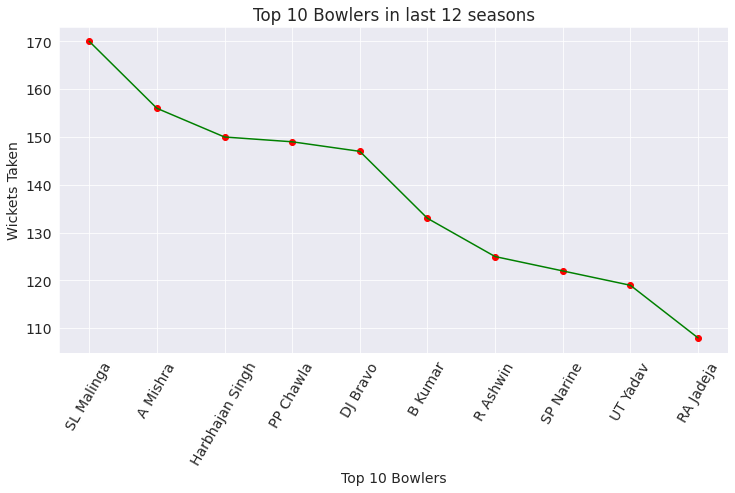

In [22]:
plt.figure(figsize=(12,6))
plt.scatter(top_bowlers['bowler'],top_bowlers['Wickets'],color='r');
plt.plot(top_bowlers['bowler'],top_bowlers['Wickets'],color='g');
plt.xticks(rotation=60)
plt.xlabel('Top 10 Bowlers')
plt.ylabel('Wickets Taken')
plt.title('Top 10 Bowlers in last 12 seasons');

Lasith Malinga, the Sri Lankan fast bowler, has taken the maximum number(170) wickets in the last 12 seasons of the IPL, followed by Amit Mishra and Harbhajan Singh.

### Matches Played vs Matches Won

In [23]:
matches_played=pd.concat([ipl_df['team1'],ipl_df['team2']])
matches_played=matches_played.value_counts().reset_index()
matches_played.columns=['Team','Total Matches']
matches_played['wins']=ipl_df['winner'].value_counts().reset_index()['winner']

matches_played.set_index('Team',inplace=True)

In [24]:
matches_played.reset_index()

,Team,Total Matches,wins
0,Mumbai Indians,187,109
1,Royal Challengers Bangalore,180,100
2,Kolkata Knight Riders,178,92
3,Kings XI Punjab,176,84
4,Chennai Super Kings,164,82
5,Delhi Daredevils,161,75
6,Rajasthan Royals,147,67
7,Sunrisers Hyderabad,108,58
8,Deccan Chargers,75,29
9,Pune Warriors,46,13


In [25]:
win_percentage = round(matches_played['wins']/matches_played['Total Matches'],3)*100
win_percentage

Team
Mumbai Indians                 58.3
Royal Challengers Bangalore    55.6
Kolkata Knight Riders          51.7
Kings XI Punjab                47.7
Chennai Super Kings            50.0
Delhi Daredevils               46.6
Rajasthan Royals               45.6
Sunrisers Hyderabad            53.7
Deccan Chargers                38.7
Pune Warriors                  28.3
Gujarat Lions                  40.0
Rising Pune Supergiant         62.5
Delhi Capitals                 62.5
Kochi Tuskers Kerala           42.9
Rising Pune Supergiants        35.7
dtype: float64

We can see the Win percentage of each team. When we look at it closely, we find that Delhi Capitals has the best stats. But when we see the number of matches played by Delhi Capitals, we find that it is quite low as compared with the other teams. This is so because earlier Delhi used to play with the name of Delhi Daredevils and then renamed to Delhi Capitals.

We can see the same data in a bar plot more easily, so let's plot it.

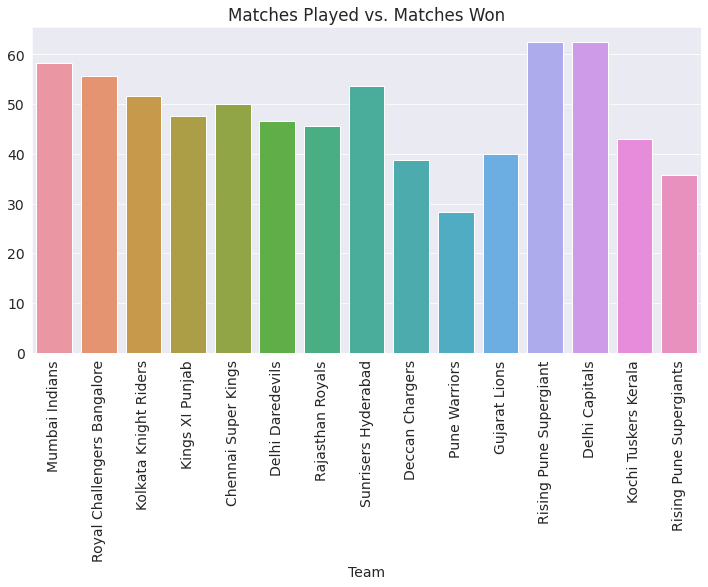

In [26]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
plt.title('Matches Played vs. Matches Won')
sns.barplot(matches_played['Total Matches'].index, win_percentage);

In this graph, we can clearly see that Delhi Capitals has the best stats. But now that we know the reason, we can say that Mumbai Indians have the best winning percentage as compared to other teams.

### Maximum Runs Scored By A Team

In [27]:
high_scores = deliveries_df.groupby(['match_id', 'inning','batting_team','bowling_team'])['total_runs'].sum().reset_index() 
high_scores = high_scores[high_scores['total_runs']>=200]
high_scores.nlargest(10,'total_runs')

,match_id,inning,batting_team,bowling_team,total_runs
829,411,1,Royal Challengers Bangalore,Pune Warriors,263
1370,7937,1,Kolkata Knight Riders,Kings XI Punjab,250
1250,620,1,Royal Challengers Bangalore,Gujarat Lions,248
416,206,1,Chennai Super Kings,Rajasthan Royals,246
1498,11338,1,Kolkata Knight Riders,Mumbai Indians,241
122,61,1,Chennai Super Kings,Kings XI Punjab,240
1134,562,1,Royal Challengers Bangalore,Mumbai Indians,235
1426,11147,1,Sunrisers Hyderabad,Royal Challengers Bangalore,233
596,296,1,Kings XI Punjab,Royal Challengers Bangalore,232
1500,11339,1,Sunrisers Hyderabad,Kings XI Punjab,232


Royal Challengers Bangalore has scored the maximum runs in one innings against Pune Warriors India, followed by Kolkata Knight Riders against Kings XI Punjab and then again Royal Challengers Bangalore against Gujarat Lions.

Well, the match in which RCB scored 263 runs is the same match win which Chris Gayle scored unbeated 175.

### Biggest win by runs each season

First of all, in the dataset we have a column called Season which contains data as : 'IPL-2017'. But we want the data as : 2017 . So, we will add a new column called Year in the dataset which contains the year in which match was held.

In [29]:
ipl_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium


In [31]:
season = ipl_df.season.values
year = []
for i in range(len(season)):
    year.append(int(season[i]))
ipl_df['Year'] = year
ipl_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,Year
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",2017
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,2017
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,2017
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,2017
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,2019
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,2019
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,2019
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,2019


Now that we have a column called Year, we can compare in which year what was the maximum run by which a team won?

In [32]:
y = 2008
season=[]
win_by_runs_max=[]
while y<2020:
    season.append(y)
    win_by_runs_max.append(ipl_df[ipl_df['Year']==y]['win_by_runs'].max())
    y += 1
win_by_runs_max

[140, 92, 98, 111, 86, 130, 93, 138, 144, 146, 102, 118]

We have got a list of runs . We can plot it right away.

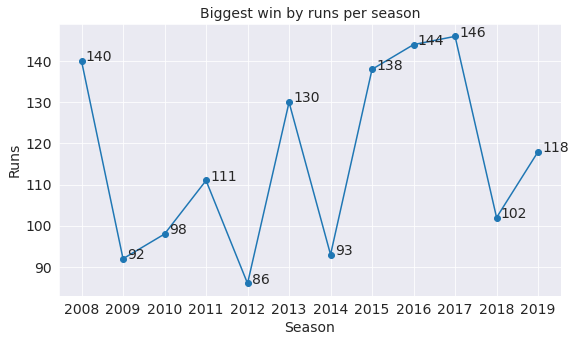

In [33]:
plt.plot(season,win_by_runs_max)
plt.scatter(season,win_by_runs_max)
count=0
while count < 12:
    plt.text(season[count]+0.1,win_by_runs_max[count],str(win_by_runs_max[count]),size=14)
    count+=1
plt.xticks(range(2008,2020),fontsize=14)
plt.xlabel('Season')
plt.ylabel('Runs')
plt.title('Biggest win by runs per season',fontsize=14)
plt.show()

## Asking and Answering Questions

Now, let us answer some basic questions that one might want to know about the IPL seasons.

### Q. Which team won the maximum number of matches in all seasons?

In [34]:
winner = ipl_df.winner.value_counts()
winner

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

We can see that **Mumbai Indians** have won the maximum number of matches in the last 12 seasons of IPL, followed by **Chennai Super Kings** and **Kolkata Knight Riders**. So, we may say that Mumbai Indians has been the most successful team in the IPL.
We can also see that few teams like Kochi Tuskers Kerala, Delhi Capitals, Pune Warriors, etc. have won very less number of matches. The reason for this is they had played the IPL for just 1 or 2 seasons.

Let's plot the above data using a barplot.

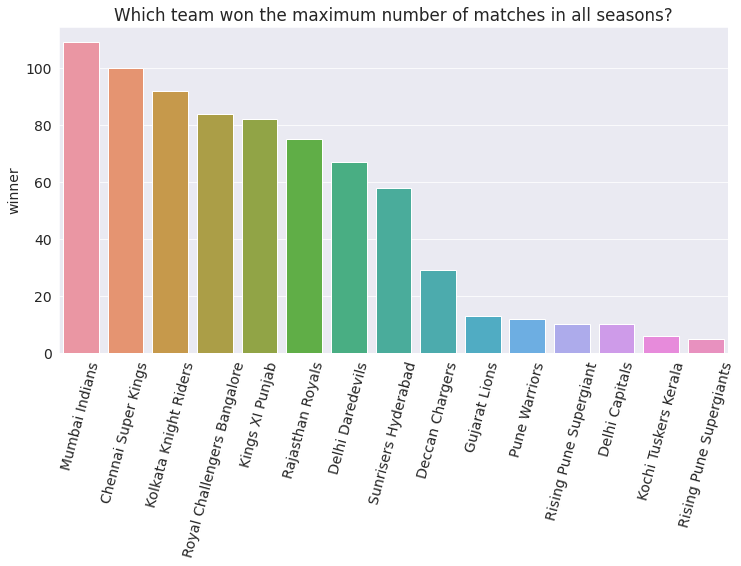

In [35]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Which team won the maximum number of matches in all seasons?')
sns.barplot(winner.index, winner);

### Q. Which player has become the Man of the Match most number of times?

In [36]:
m_o_m = ipl_df.player_of_match.value_counts()
m_o_m

CH Gayle          21
AB de Villiers    20
RG Sharma         17
MS Dhoni          17
DA Warner         17
                  ..
PD Collingwood     1
NV Ojha            1
AC Voges           1
J Theron           1
S Hetmyer          1
Name: player_of_match, Length: 226, dtype: int64

Whoh! The GayleStorm **Chris Gayle** has become Man of the Match most number of times, followed by Mr. 360 **AB de Villiers**, our very own Hitman **Rohit Sharma**, Thalaiva **MS Dhoni** and Reverend **David Warner**.

But here's a quick fun fact : _Despite having outstanding performance in IPL, Chris Gayle had gone unsold twice in the IPL 2018 auction before being taken by Kings XI Punjab at his base price of ₹2 Crores_.

Now, let's again plot a barplot to see the same data more clearly.

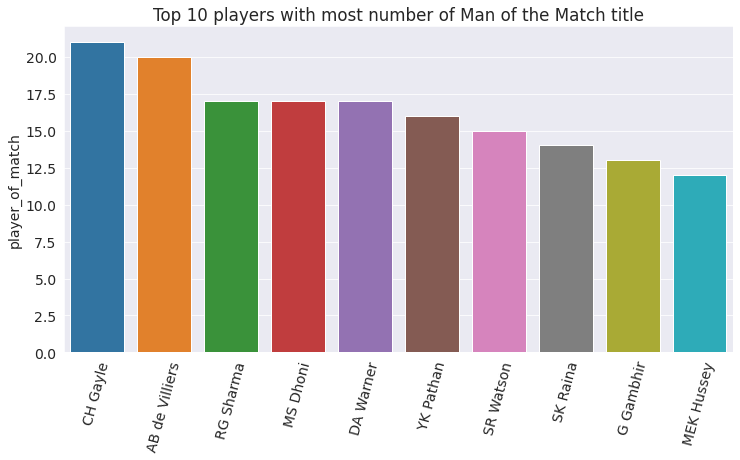

In [37]:
m_o_m_10 = m_o_m[:10]
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Top 10 players with most number of Man of the Match title')
sns.barplot(m_o_m_10.index, m_o_m_10);

### Q. Does winning the toss increase the chances of winning the match?

In [38]:
win = ipl_df.winner == ipl_df.toss_winner
win_counts = win.value_counts()
win_counts

True     393
False    363
dtype: int64

Out of 756 matches in the last 12 seasons, we can see that the toss winning team has won the match 393 times but has lost the match 363 times. Well, the difference is not that much.

Let's see the data in percentage first and then plot a pie chart for it.

In [39]:
round((win_counts/win.count())*100,2)

True     51.98
False    48.02
dtype: float64

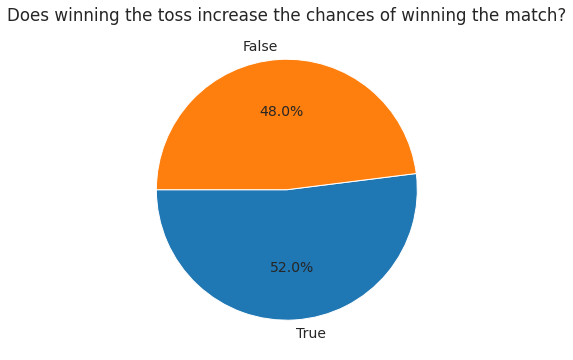

In [40]:
plt.figure(figsize=(12,6))
plt.title('Does winning the toss increase the chances of winning the match?')
plt.pie(win_counts,labels=win_counts.index,autopct='%1.1f%%', startangle=180);

### Q. Who are the Top 5 scoring batsmen?

In [41]:
batsmen = deliveries_df.groupby('batsman').apply(lambda x : np.sum(x['batsman_runs'])).reset_index(name='Runs')
batsmen_sorted=batsmen.sort_values(by='Runs',ascending=False)
top_batsmen=batsmen_sorted[:5]
top_batsmen

,batsman,Runs
486,V Kohli,5434
428,SK Raina,5415
367,RG Sharma,4914
112,DA Warner,4741
392,S Dhawan,4632


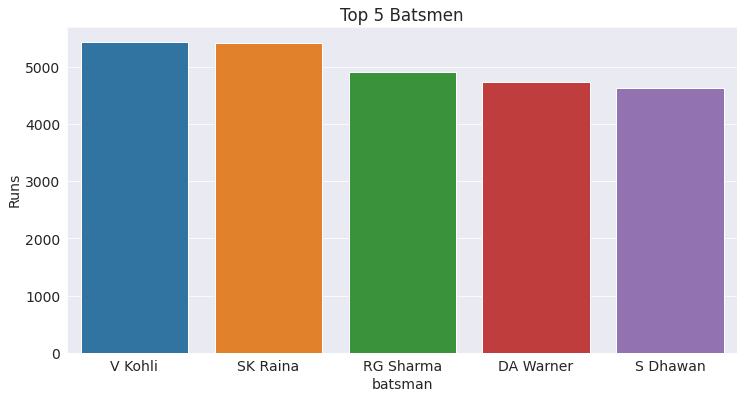

In [42]:
plt.figure(figsize=(12,6))
plt.title('Top 5 Batsmen')
sns.barplot(top_batsmen['batsman'],top_batsmen['Runs']);

Thus, we understood that why Virat Kohli is called the Run Machine. He has scored 5434 runs in total, followed by Suresh Raina with slightly less 5415 runs and Rohit Sharma with 4914 runs.

### Q. What is the maximum run by which a team won?

We know that a team can win by runs only if it bats first. So, to answer this question, we will first separate the teams which have batted first.

In [43]:
batting_first_team = ipl_df[ipl_df.win_by_runs != 0]
batting_first_team.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,Year
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",2017
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,2017
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,2017
13,14,2017,Kolkata,2017-04-15,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens,2017
14,15,2017,Delhi,2017-04-15,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Delhi Daredevils,51,0,CJ Anderson,Feroz Shah Kotla,2017


Now that we have a separate dataframe where we have teams who have batted first, we can plot a histogram and visualize the graph.

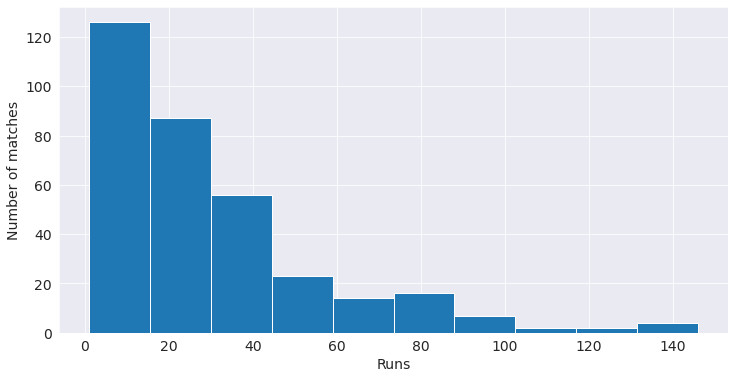

In [44]:
plt.figure(figsize=(12,6))
plt.hist(batting_first_team['win_by_runs'])
plt.xlabel('Runs')
plt.ylabel('Number of matches')
plt.show()

We can see that in almost around 140 matches, teams have won with a margin of 0-20 runs whereas only one or two team has won match with a margin of 120-140 runs. One of such matches is RCB vs PWI as we have mentioned it already.

### Q. What is the maximum wicket by a which a team won?

Similarly to answer this question, we have to find which team has bowled first and we will separate them out.

In [45]:
bowling_first_team = ipl_df[ipl_df.win_by_wickets != 0]
bowling_first_team.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,Year
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,2017
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,2017
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,2017
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",2017
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,2017


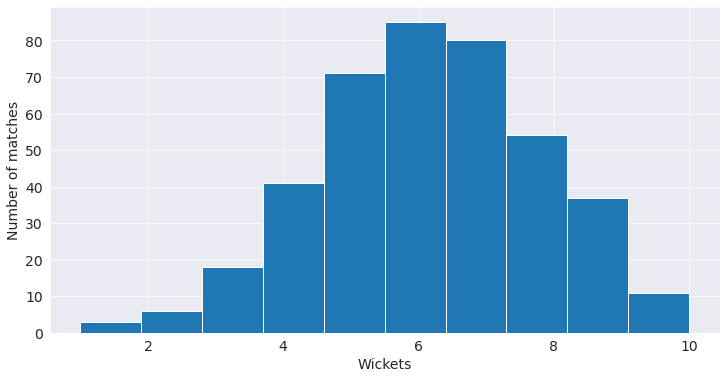

In [46]:
plt.figure(figsize=(12,6))
plt.hist(bowling_first_team['win_by_wickets'])
plt.xlabel('Wickets')
plt.ylabel('Number of matches')
plt.show()

We can see that around 85 matches have been won by 6 wickets, 70 matches with 5 wickets, 80 matches with 7 wickets. We can also find that 10 matches have been won by 10 wickets meaning the opening batsmen were enough for the opponents.

## Inferences and Conclusion

These are the few conclusions that I can draw from the above analysis.

* There are several players who perform very good in these private tournaments. But sometimes, they aren't even selected in the playing 11 team or sometimes remain unsold. The reason can be their inconsistent performance that they become burden for their team. We can consider Chris Gayle. He performs outstanding in some matches while in other he becomes burden for the team.

* During the analysis, we found that which team can be considered as the most successful team over the last 12 seasons, which batsman is the highest scorer and who has taken most number of wickets.

## Most successfull Team - Mumbai Indian 
## Most successfull Player - Virat Kohli 

### Rest All Required Inferences Are Mentioned in graphical form